In [54]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [55]:
m1 = np.array([[4.3, 2.3, 3.6, 4.8, 2.8, -3.3],[2.2, -4.4, 4.3, 3.5, 0.1, -1.1],[1, 0, 1, 1, 1, 0]])

In [56]:
m1

array([[ 4.3,  2.3,  3.6,  4.8,  2.8, -3.3],
       [ 2.2, -4.4,  4.3,  3.5,  0.1, -1.1],
       [ 1. ,  0. ,  1. ,  1. ,  1. ,  0. ]])

In [207]:
class Preceptron(object):
  def __init__(self, eps = 0.0001, iter = 15):
    self.epsilon = eps
    self.iterations = iter
    self.th = random.random()

  def predict_proba(self, X):
    return np.dot(X, self.w) + self.th
  
  def predict(self, X):
    r = np.dot(X, self.w) + self.th
    return r >= 0
  
  def fit(self, X, y):
      np.random.seed(42)
      self.w = np.random.rand(X.shape[1])
      loss = []
      for i in range(self.iterations):
        er = 0
        for xi, yi in zip(X, y):
          pred = self.predict(xi)
          #er += pred - yi
          if (pred != yi):
            er += 1
            self.w -= self.epsilon * np.dot(xi.transpose(), pred - yi)
            self.th -= self.epsilon * (pred - yi)
        er = er / len(y)
        loss.append(er)
      return loss

In [221]:
p = Preceptron(iter = 5)

In [222]:
X = m1[:-1].transpose()
print(X.shape)
y = m1[2].transpose()
print(y.shape)

(6, 2)
(6,)


In [223]:
l = p.fit(X, y)

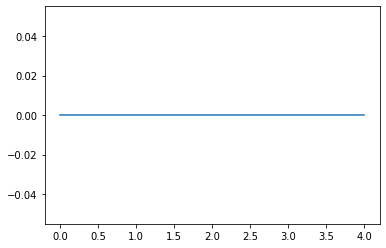

In [224]:
plt.plot(l)

In [215]:
#проверка на рандомных точках
xx = np.array([[7],[2]]).transpose()
print(xx)
print(p.predict(xx))

xx = np.array([[7],[-6]]).transpose()
print(xx)
print(p.predict(xx))

[[7 2]]
[ True]
[[ 7 -6]]
[False]


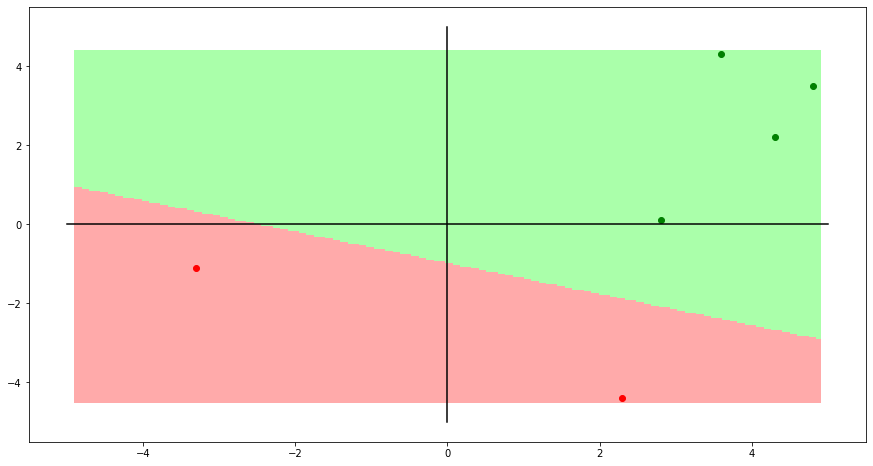

In [216]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))
eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.max(X[:,0]) * (-1) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))
Z = p.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter([4.3, 3.6, 4.8, 2.8],[2.2, 4.3, 3.5, 0.1], c = 'green')
plt.scatter([2.3, -3.3], [-4.4, -1.1], c = 'red')
plt.plot([0, 0],[-5, 5], c = "black")
plt.plot([-5, 5],[0, 0], c = "black")
plt.show()

In [217]:
#изменение обучающего множества чтобы сделать линейно неразделимым - поменяю класс у 4 точки на противоположный

m2 =  np.array([[4.3, 2.3, 3.6, 4.8, 2.8, -3.3, 3.0],[2.2, -4.4, 4.3, 3.5, 0.1, -1.1, 0.5],[1, 0, 1, 0, 1, 0, 0]])
X2 = m2[:-1].transpose()
print(X2.shape)
y2 = m2[2].transpose()
print(y2.shape)

(7, 2)
(7,)


In [218]:
p2 = Preceptron(iter = 50)

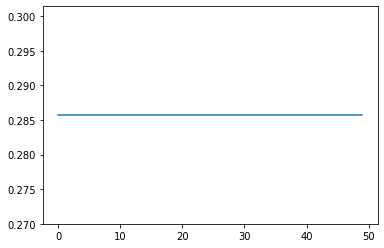

In [219]:
l2 = p2.fit(X2, y2)
plt.plot(l2)

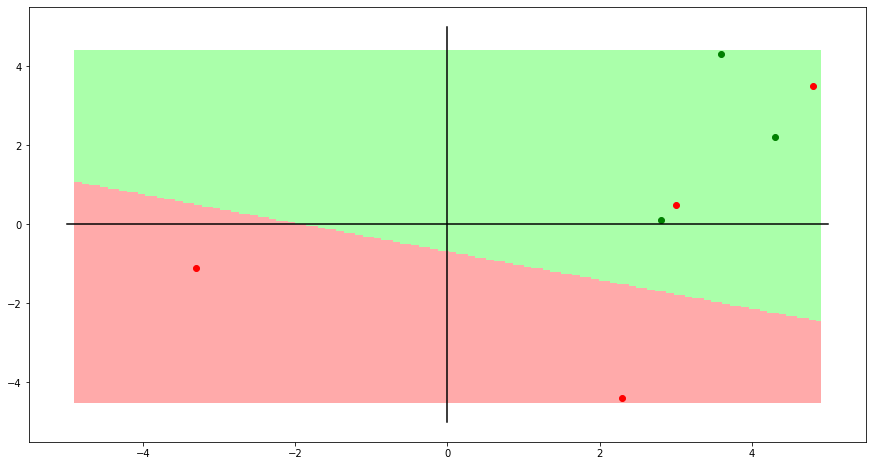

In [220]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))
eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.max(X2[:,0]) * (-1) - eps, np.max(X2[:,0]) + eps, 200),
                     np.linspace(np.min(X2[:,1]) - eps, np.max(X2[:,1]) + eps, 200))
Z = p2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter([4.3, 3.6, 2.8],[2.2, 4.3, 0.1], c = 'green')
plt.scatter([2.3, -3.3, 4.8, 3.0], [-4.4, -1.1, 3.5, 0.5], c = 'red')
plt.plot([0, 0],[-5, 5], c = "black")
plt.plot([-5, 5],[0, 0], c = "black")
plt.show()

In [192]:
# 4 класса, вторая обучающая выборка
m3 =  np.array([[-4.4, 0.2, 1.5, -2.1, -4.9, -3.4, -1.3, -0.2],[-1.1, -0.9, -1.2, -0.7, 4.8, -4.0, -3.1, -1.7], [2, 0, 1, 0, 1, 2, 0, 0,]])

In [193]:
X3 = m3[:-1]
y3 = m3[-1]

X3 = X3.transpose()
y3 = y3.transpose()

print(X3)
print(y3)

[[-4.4 -1.1]
 [ 0.2 -0.9]
 [ 1.5 -1.2]
 [-2.1 -0.7]
 [-4.9  4.8]
 [-3.4 -4. ]
 [-1.3 -3.1]
 [-0.2 -1.7]]
[2. 0. 1. 0. 1. 2. 0. 0.]


In [158]:
class Multiclass_Preceptron(object):
  def __init__(self, class_count = 2, eps = 0.0001, iter = 15):
    self.epsilon = eps
    self.iterations = iter
    self.k = class_count

  def predict(self, X):
    t = []
    for u in range(self.k):
      t.append(np.dot(X, self.w[u]))
    return np.argmax(t, axis=0)
  
  def fit(self, X, y):
      np.random.seed(42)
      self.w = np.zeros((self.k, X.shape[1]))
      loss = []
      for i in range(self.iterations):
        l = 0
        for xi, yi in zip(X, y):
          pred = self.predict(xi)
          #l += pred - yi
          if (pred != yi):
            l += 1
            self.w[yi] += xi
            self.w[pred] -= xi
        loss.append(l / len(y))
      return loss

In [169]:
p3 = Multiclass_Preceptron(class_count = 4, eps = 0.001,iter = 27)

In [170]:
l3 = p3.fit(X3, np.int64(y3))

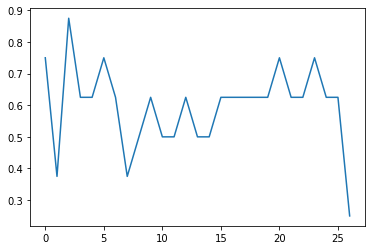

In [171]:
plt.plot(l3)

In [172]:
p3.predict(X3)

array([2, 0, 0, 2, 1, 2, 0, 0])

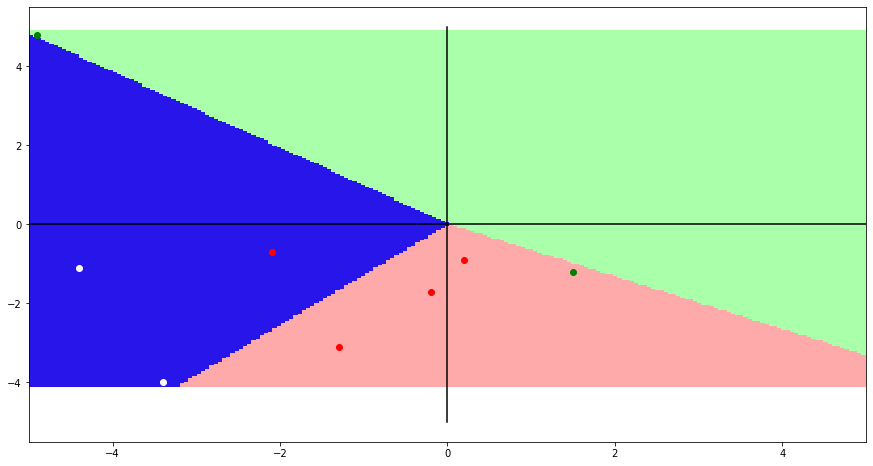

In [173]:
plt.figure(figsize=(15,8))
eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X3[:,0]) - eps, np.min(X3[:,0]) * -1 + eps, 200),
                     np.linspace(np.min(X3[:,1]) - eps, np.max(X3[:,1]) + eps, 200))
Z = p3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#2715ea'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter([-4.4, -3.4], [-1.1, -4], c = 'white')
plt.scatter([0.2, -2.1, -1.3, -0.2], [-0.9, -0.7, -3.1, -1.7], c = 'red')
plt.scatter([1.5, -4.9], [-1.2, 4.8], c = 'green')
plt.plot([0, 0],[-5, 5], c = "black")
plt.plot([-5, 5],[0, 0], c = "black")
plt.show()

In [225]:
# 4 класса, вторая обучающая выборка
m4 =  np.array([[-4.4, 0.2, 1.5, -2.1, -4.9, -3.4, -1.3, -0.2],[-1.1, -0.9, -1.2, -0.7, 4.8, -4.0, -3.1, -1.7], [1,0,0,0,0,1, 0, 0],[0, 0, 1, 0, 1, 0, 0, 0,]])

In [226]:
X4 = m4[:-2].transpose()
y4 = m4[-2:].transpose()
print(X4)
print(y4)

[[-4.4 -1.1]
 [ 0.2 -0.9]
 [ 1.5 -1.2]
 [-2.1 -0.7]
 [-4.9  4.8]
 [-3.4 -4. ]
 [-1.3 -3.1]
 [-0.2 -1.7]]
[[1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]]


In [284]:
class Multiclass_Preceptron_1(object):
  def __init__(self, class_count = 2, eps = 0.01, iter = 15):
    self.epsilon = eps
    self.iterations = iter
    self.k = class_count

  def predict(self, X):
    t = []
    for u in range(self.k):
      t.append(np.dot(X, self.w[u]) + self.th[u] >= 0)
    return np.array(t).transpose()
  
  def fit(self, X, y):
      np.random.seed(42)
      self.w = np.zeros((self.k, X.shape[1]))
      self.th = np.zeros(self.k)
      loss = []
      for i in range(self.iterations):
        l1 = 0
        for xi, yi in zip(X, y):
          pred = self.predict(xi)
          if (np.any(pred != yi)):
            l1 += 1
          if (pred[0] != yi[0]):
            self.w[0] -= self.epsilon * np.dot(xi, pred[0] - yi[0])
            self.th[0] -= self.epsilon * (pred[0] - yi[0])
          if (pred[1] != yi[1]):
            self.w[1] -= self.epsilon * np.dot(xi, pred[1] - yi[1])
            self.th[1] -= self.epsilon * (pred[1] - yi[1])
        loss.append(l1 / len(y))
      return loss

In [323]:
p4 = Multiclass_Preceptron_1(iter = 9)

In [324]:
l4 = p4.fit(X4,y4)

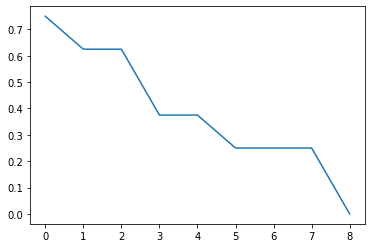

In [325]:
plt.plot(l4)

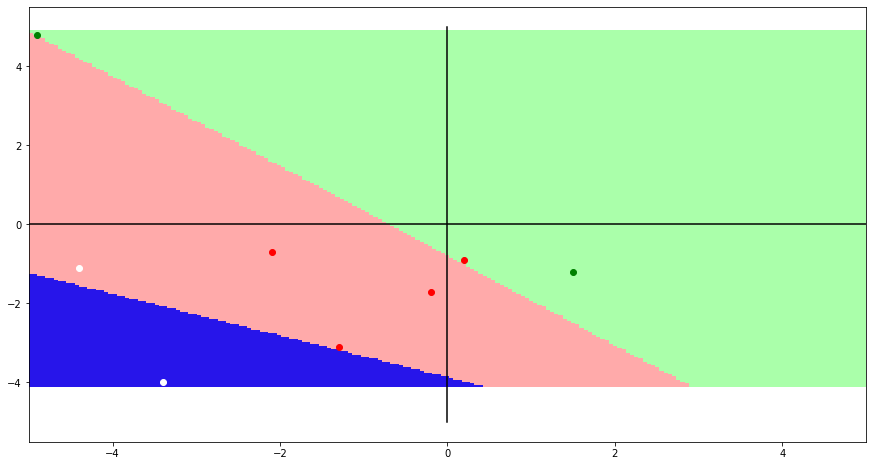

In [327]:
plt.figure(figsize=(15,8))
eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X4[:,0]) - eps, np.min(X4[:,0]) * -1 + eps, 200),
                     np.linspace(np.min(X4[:,1]) - eps, np.max(X4[:,1]) + eps, 200))
Z = p4.predict(np.c_[xx.ravel(), yy.ravel()])
ZZ = []
for z in Z:
  if z[0] == 0:
    if z[1] == 0:
      ZZ.append(0)
    else:
      ZZ.append(1)
  elif z[0] == 1:
    if z[1] == 0:
      ZZ.append(2)
    else:
      ZZ.append(3)
ZZ = np.array(ZZ)
ZZ = ZZ.reshape(xx.shape).transpose()
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#2715ea'])
plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light)

plt.scatter([-4.4, -3.4], [-1.1, -4], c = 'white')
plt.scatter([0.2, -2.1, -1.3, -0.2], [-0.9, -0.7, -3.1, -1.7], c = 'red')
plt.scatter([1.5, -4.9], [-1.2, 4.8], c = 'green')
plt.plot([0, 0],[-5, 5], c = "black")
plt.plot([-5, 5],[0, 0], c = "black")
plt.show()